In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.decomposition import LatentDirichletAllocation, NMF
import nltk
from collections import Counter
import textblob            #to import
from textblob import TextBlob

In [20]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
# Importing dataset
df = pd.read_csv("dd.csv")
df.head()

,Text
0,"enormous tropical forests, little known to man..."
1,"\n\n\nThere is not in Italy, they say (and I b..."
2,\nSection 1.\n\nPHYSICK FOR THE SICKNESSE.\nTH...
3,\n\n\nReligion is the greatest enemy to religi...
4,\nThese unspeakable benefits which ye have co...


In [22]:
#remove puncuation
for i in df:
    df[i] = df[i].str.replace(r'[^\w\s]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
#remove \n
for i in df:
    df[i] = df[i].str.replace('\n', '')

In [24]:
#remove all numbers
for i in df:
    df[i] = df[i].apply(lambda x: re.sub('W*dw*','',x))

In [25]:
#make all words lowercase
for i in df:
    df[i] = df[i].apply(lambda x:x.lower())

In [26]:
#remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

for i in df:
    df[i] = df[i].apply(lambda x: remove_stopwords(x))

In [27]:
#lemmetization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

for i in df:
    df[i] = df[i].apply(lambda text: lemmatize_words(text))

In [28]:
text = (df.iloc[:,0])

In [29]:
for i in df:
    df[i] = df[i].str.split()

In [ ]:
flower_dict = ['flower', 'flowers', 'lily', 'lilies', 'rose', 'roses', 'blossom', 'tulip', 'tulips' ]

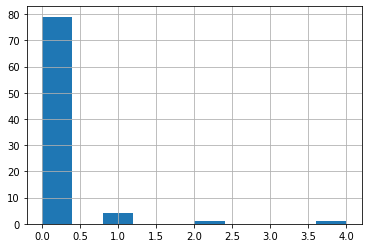

In [30]:
t = text.map(lambda x: x.count('blossom')) 
t.hist()

In [31]:
df['lemma_str'] = [' '.join(map(str,l)) for l in text]
df.head()

,Text,lemma_str
0,"[enormous, tropical, forest, little, known, ma...",enormous tropical forest little known manan ga...
1,"[italy, say, believe, lovelier, resience, pala...",italy say believe lovelier resience palazzo pe...
2,"[section, 1physick, sicknessethe, wor, plague,...",section 1physick sicknessethe wor plague engli...
3,"[religion, greatest, enemy, religion, false, t...",religion greatest enemy religion false true fa...
4,"[unspeakable, benefit, ye, conceive, wor, ye, ...",unspeakable benefit ye conceive wor ye receive...


In [32]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,Text,lemma_str,sentiment
0,"[enormous, tropical, forest, little, known, ma...",enormous tropical forest little known manan ga...,0.308886
1,"[italy, say, believe, lovelier, resience, pala...",italy say believe lovelier resience palazzo pe...,0.201321
2,"[section, 1physick, sicknessethe, wor, plague,...",section 1physick sicknessethe wor plague engli...,0.166927
3,"[religion, greatest, enemy, religion, false, t...",religion greatest enemy religion false true fa...,0.207803
4,"[unspeakable, benefit, ye, conceive, wor, ye, ...",unspeakable benefit ye conceive wor ye receive...,0.221223


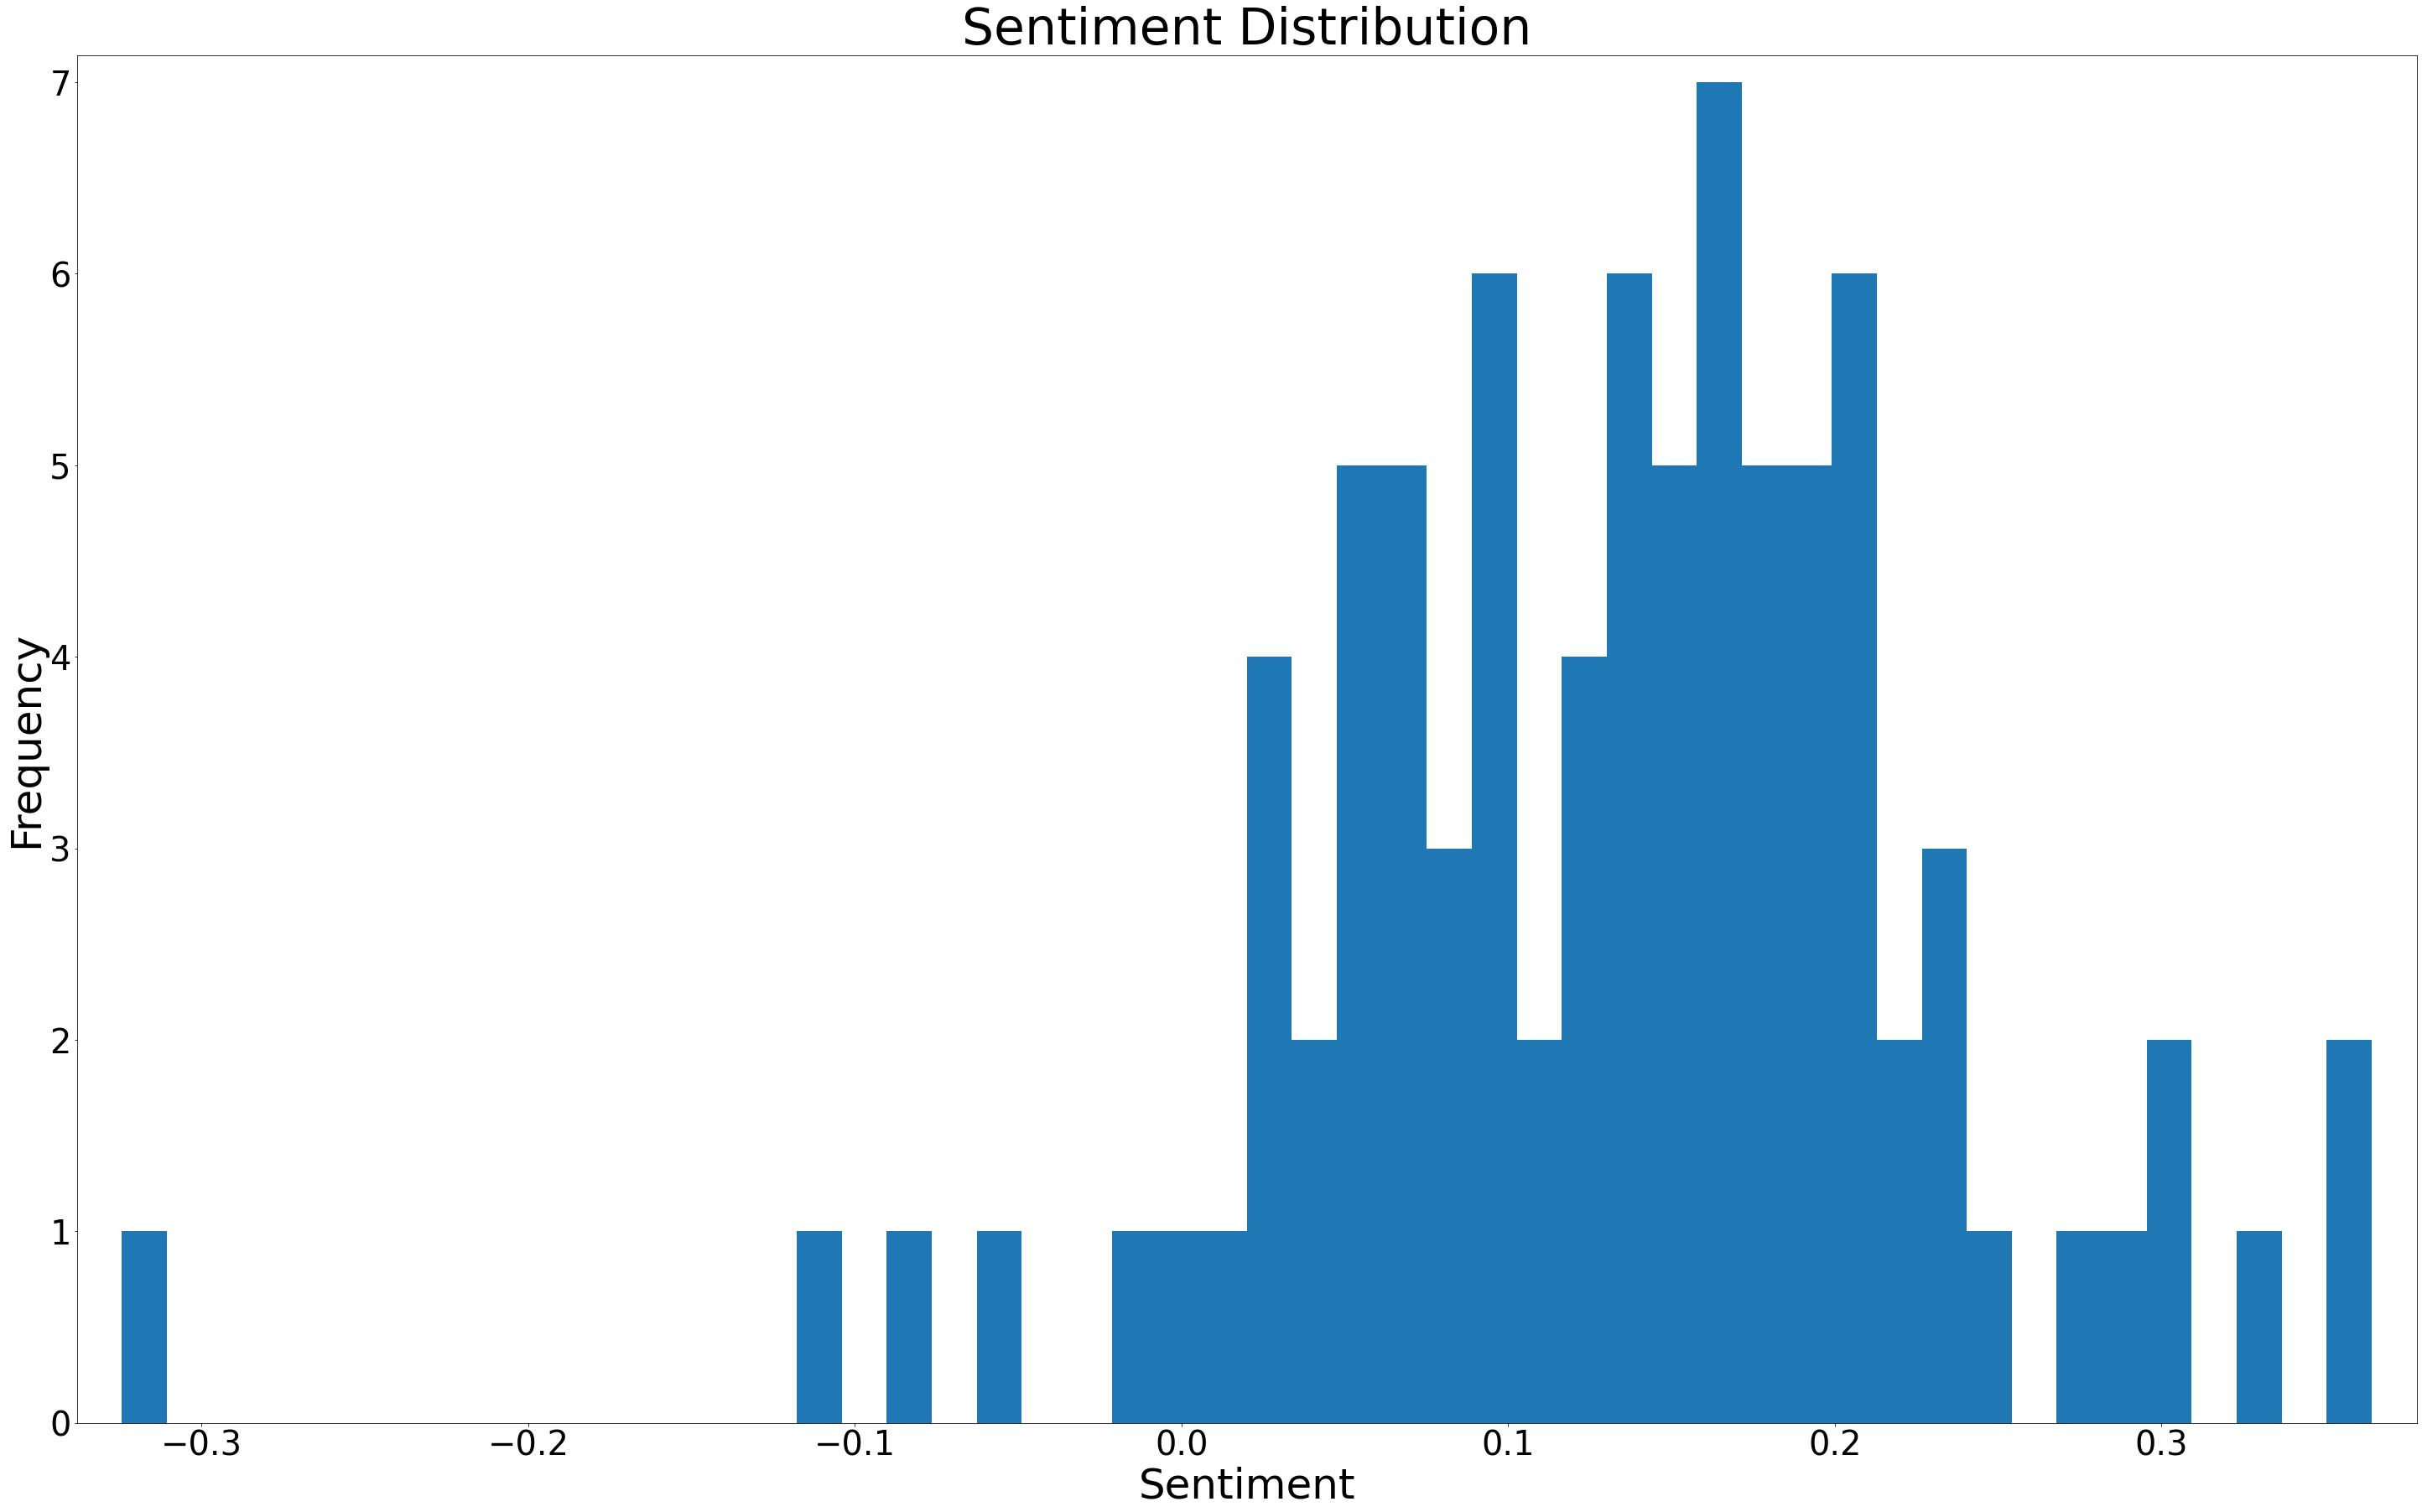

In [33]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [34]:
df['word_count'] = text.apply(lambda x: len(str(x).split()))
df['review_len'] = df['lemma_str'].astype(str).apply(len)

In [50]:
df['word_count'].sum()

52068

In [36]:

allwords = []
for wordlist in text:
    allwords += wordlist
print(allwords)

['enormous', 'tropical', 'forest', 'little', 'known', 'manan', 'gather', 'treasure', 'forour', 'orchi', 'greenhouse', 'great', 'islan', 'conservatory', 'likejava', 'ceylon', 'borneo', 'rich', 'spice', 'lovely', 'plantlife', 'australian', 'bush', 'trace', 'plant', 'life', 'another', 'worl', 'often', 'elicate', 'oour', 'even', 'thefragments', 'see', 'greenhousesit', 'fragile', 'flowervases', 'sweetoours', 'flow', 'breathe', 'leaf', 'stem', 'thewhole', 'many', 'tree', 'bush', 'statelycum', 'tree', 'australia', 'sweet', 'verbena', 'chili', 'manymust', 'felt', 'charm', 'strange', 'scent', 'boxbush', 'oliver', 'wenell', 'holmes', 'tol', 'u', 'breathingthe', 'fragrance', 'eternity', 'one', 'oours', 'whichcarry', 'u', 'time', 'abyss', 'unbeginningpast', 'scent', 'flower', 'often', 'cloying', 'thetuberose', 'leaf', 'often', 'elightful', 'refreshing', 'green', 'buing', 'larch', 'leaf', 'balman', 'rosemary', 'many', 'case', 'fragrance', 'store', 'thewoo', 'permeates', 'rootsto', 'given', 'see', '

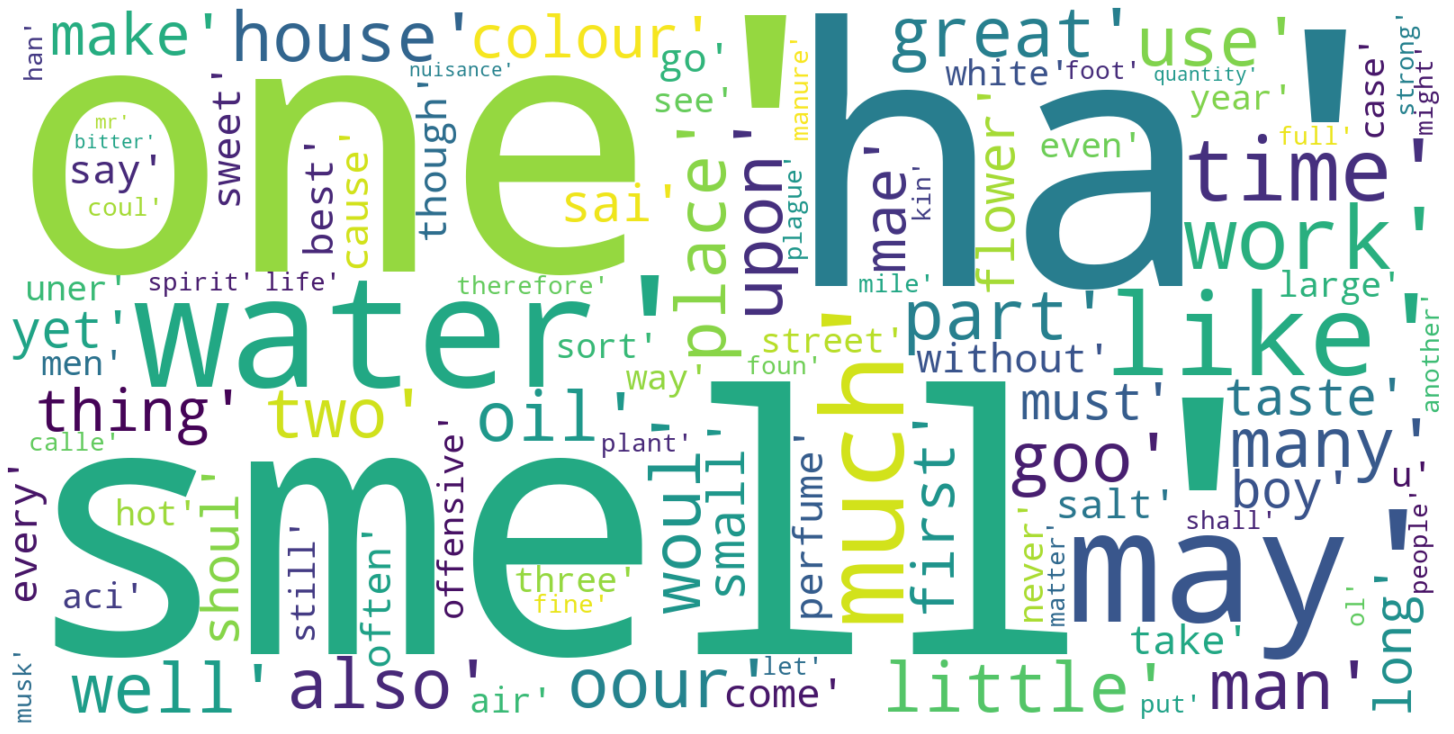

In [51]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.tight_layout(pad=0)
plt.show()

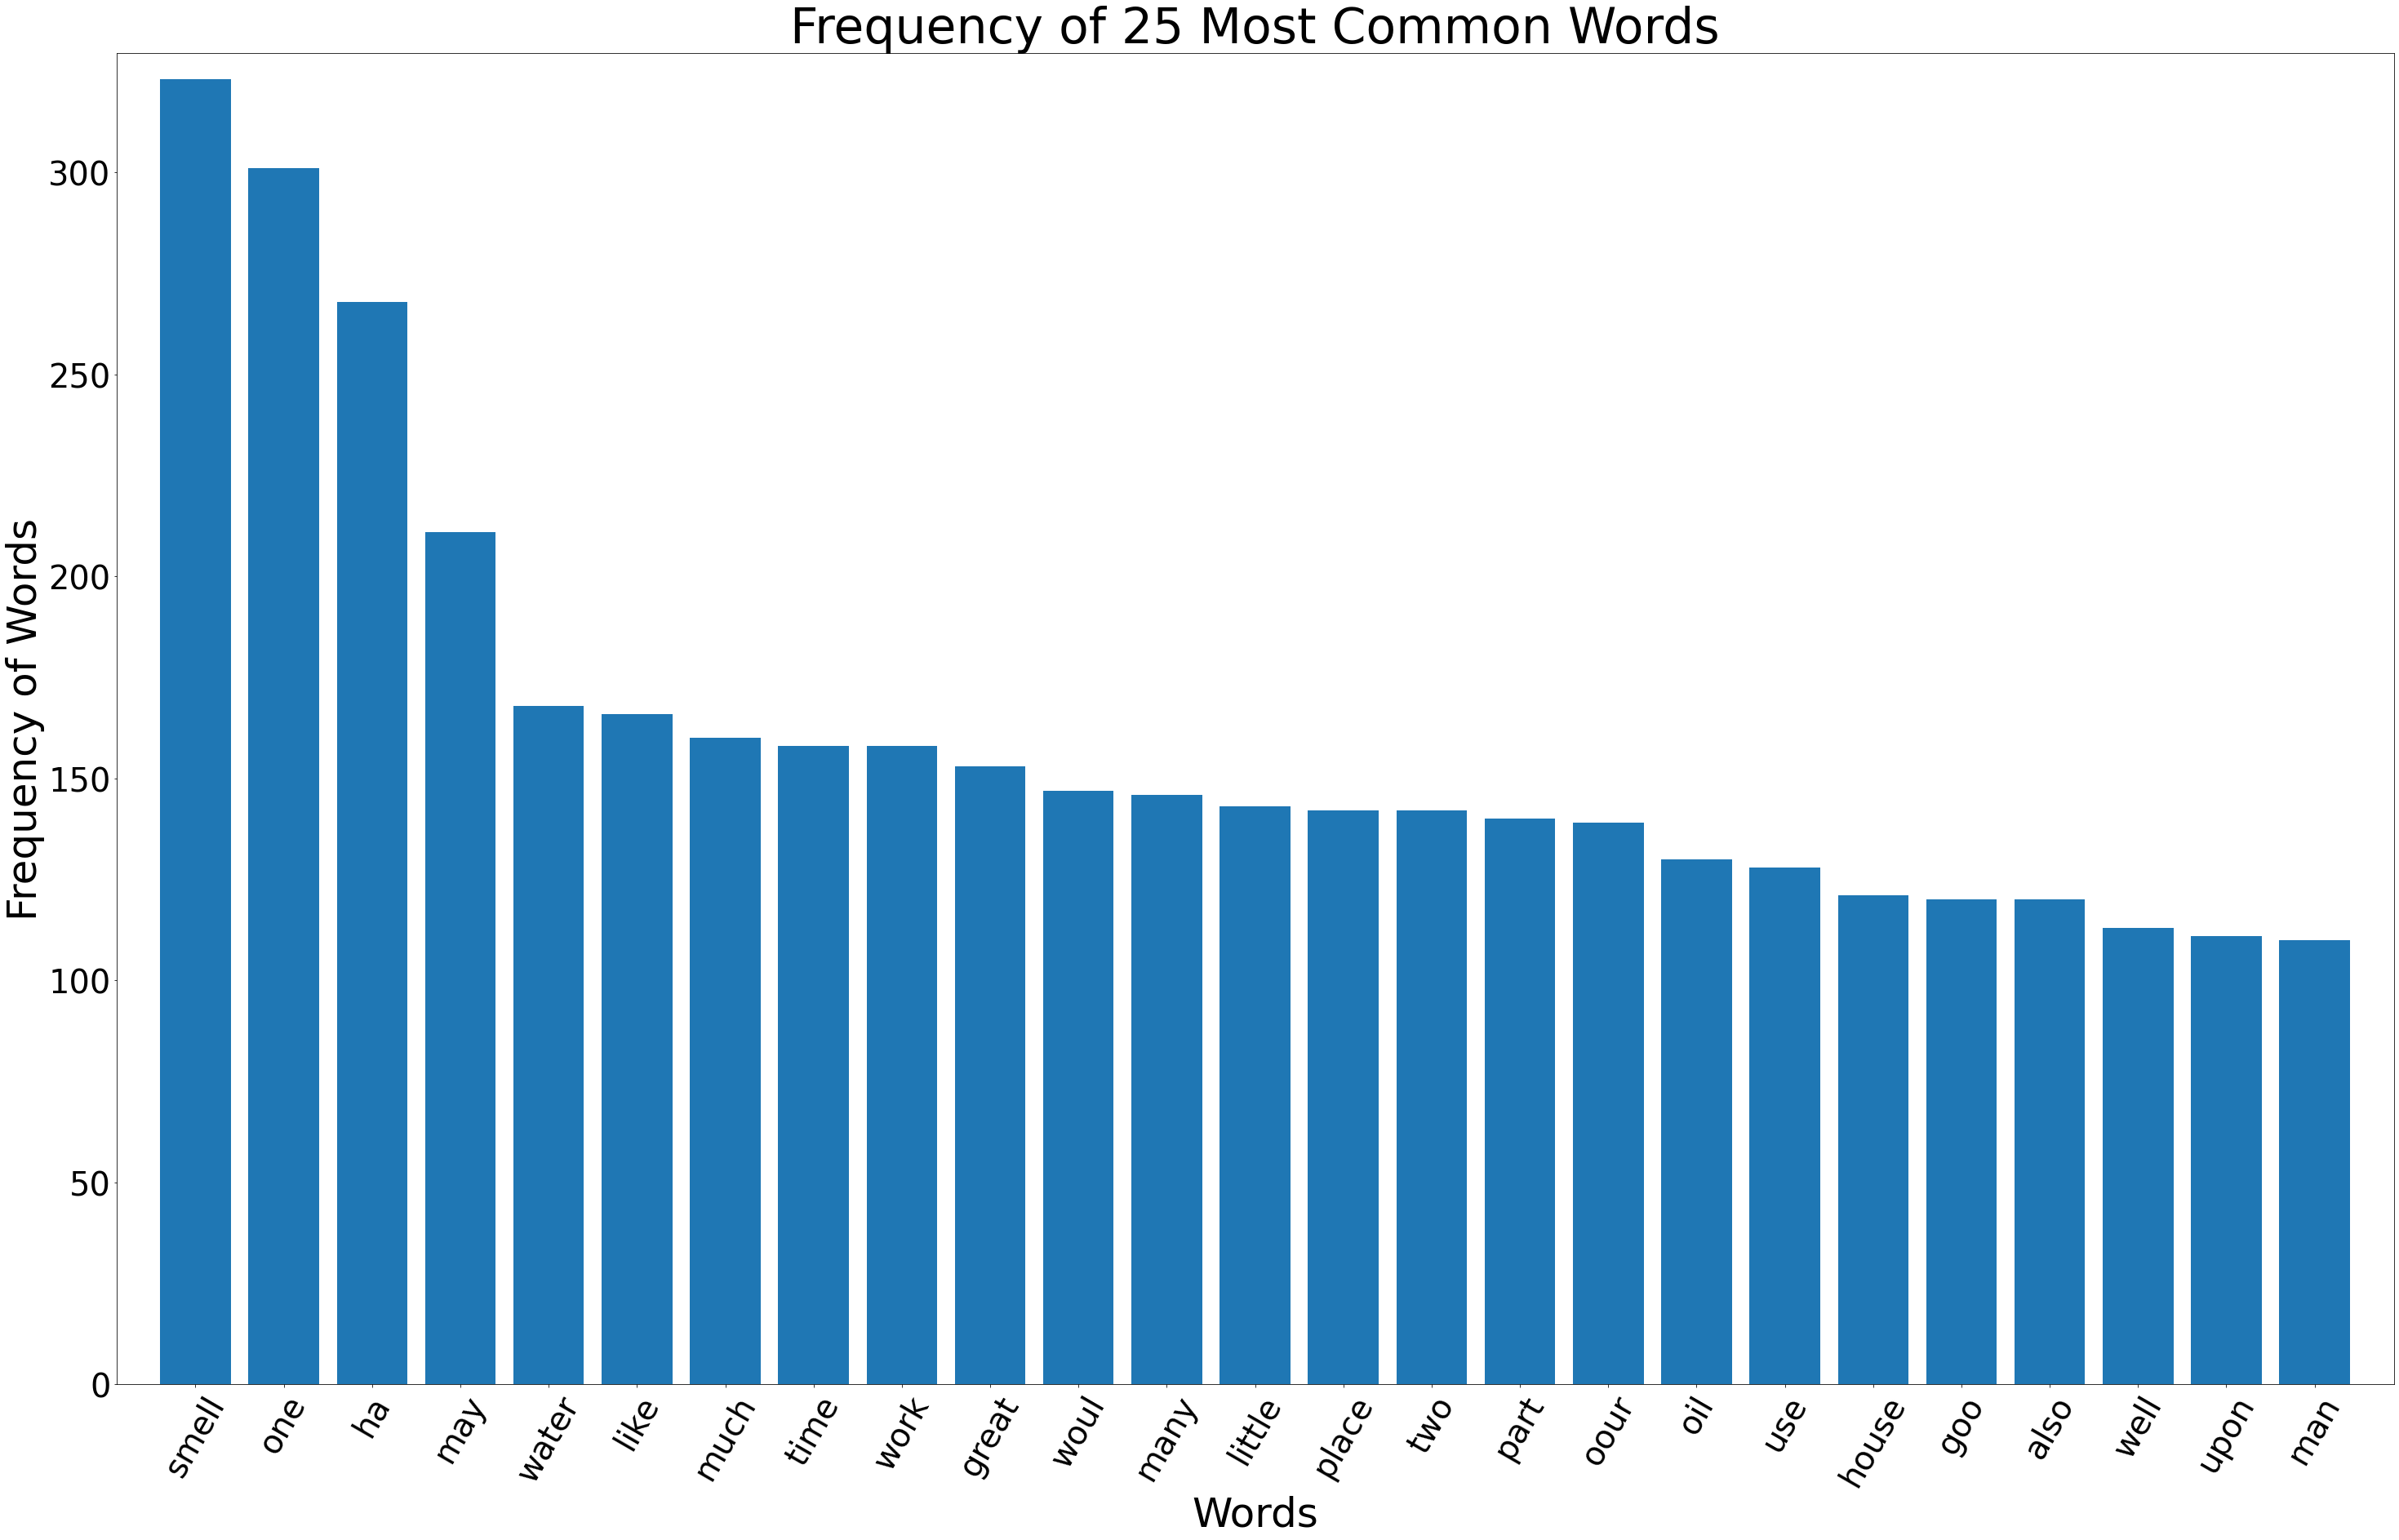

In [42]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [43]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,air,also,another,ay,best,boy,calle,cannot,cause,colour,...,uner,upon,use,water,way,well,whole,without,woul,yet
0,1,1,1,1,0,0,0,1,0,3,...,0,0,1,0,2,0,0,1,1,1
1,4,0,4,1,2,2,1,0,1,3,...,5,12,3,3,7,1,6,7,12,0
2,0,24,4,1,10,22,6,4,11,0,...,2,7,8,2,5,5,3,5,1,12
3,0,1,0,0,0,0,0,4,0,0,...,1,0,0,0,1,0,1,1,1,2
4,0,3,0,0,1,2,0,1,1,0,...,1,3,0,3,3,0,1,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,0,0,0,0,0,0,2,1,0,...,0,1,1,0,0,0,0,1,0,0
81,0,3,0,0,2,1,0,1,0,3,...,1,0,0,4,2,1,1,0,0,0
82,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
83,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
foot much well also use strong ol even boy air
Topic 1:
smell water air oour like first may common also cause
Topic 2:
ha sai one little man shoul two well woul time
Topic 3:
may upon hot must mae cause every make sweet without
Topic 4:
colour small best little smell well much large though goo
Topic 5:
oour use one time many sai may le part however
Topic 6:
ha one woul upon little never great coul sai man
Topic 7:
water one two place part time three uner often make
Topic 8:
boy may man thing goo many like go sweet perfume
Topic 9:
smell may much woul say let great one often another
